2) Build a machine learning model on hand written digits and compare the models using evaluation techniques

**Downloading the Dataset**

We will use Sklearn’s load_digits dataset, which is a collection of 8x8 images (64 features)of digits. The dataset contains a total of 1797 sample points.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
import numpy as np
np.array(digits)

array({'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6

<Figure size 1000x1000 with 0 Axes>

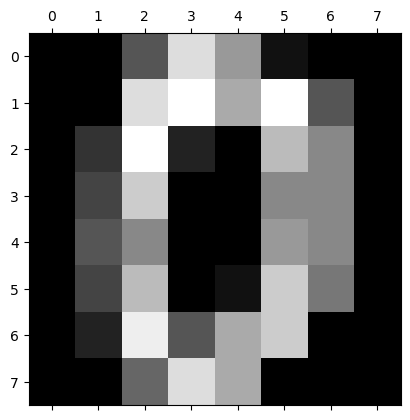

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5))
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

<Figure size 640x480 with 0 Axes>

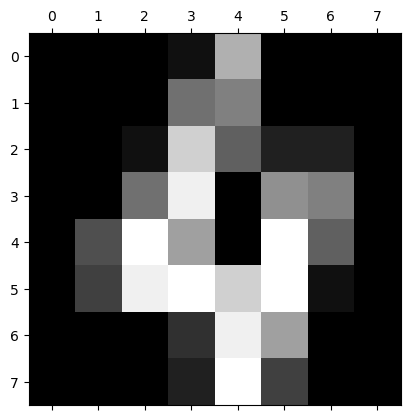

In [11]:
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show()

**Importing Relevant Libraries & Modules**

Once our dataset is loaded, we will start the coding by importing the **train_test_split** and performance **metrics**.

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Preparing Data**

Next, we will prepare the data for training by declaring **a NumPy array** data and **reshaping** it so that it has the first dimension equal to the length of the images, which is the number of samples, n_samples, but with reduced dimensionality. So the dimension of data will be 1797 x 64.

In [19]:
n_samples = len(digits.images)
print(n_samples)
print("before reshaping the dimension of images : ", digits.images.shape)
data = digits.images.reshape((n_samples, -1))
print(print("before reshaping the dimension of images : ", data.shape))

1797
before reshaping the dimension of images :  (1797, 8, 8)
before reshaping the dimension of images :  (1797, 64)
None


**Splitting Data into Train and Test**

The next step is to use the train_test_split function to split our data into 50% training and 50% testing data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0., shuffle=False)

**Classifiers**

Once we’re done with the above steps, we will use different algorithms as classifiers, make predictions, print the **‘Classification Report’**, the **‘Confusion Matrix’**, and the **‘Accuracy Score’**.

The Classification Report will give us the **precision**, **recall**, **f1-score**, **support**, and **accuracy**, whereas the Confusion Matrix will show us the number of True Positives, False Positives, and False Negatives for each Classifier.

**We will use the following classifiers from Sklearn:**

1. Support Vector Machine

2. Gaussian Naive Bayes

3. Decision Trees

4. Random Forest

5. K Nearest Neighbours

6. Stochastic Gradient Descent

**1. Support Vector Machines (SVM)**

Here is the code to define the SVM classifier svm_classifier and use it to make predictions:


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]


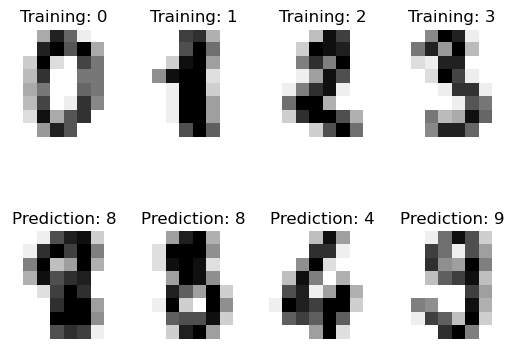

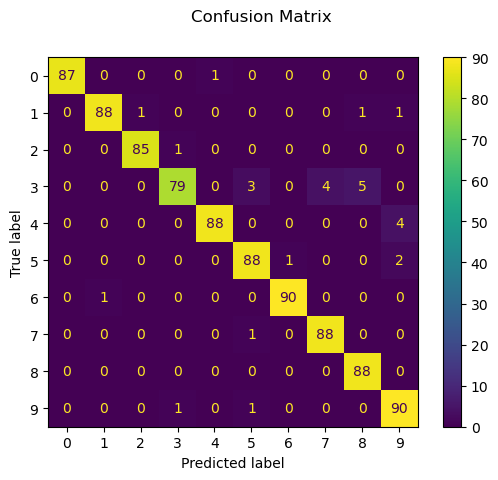

In [21]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()

The SVM Classifier gives an Accuracy of **0.9688!**

**2. Gaussian Naive Bayes**

Next, we will define the Gaussian Naive Bayes as the classifier — GNB_classifier:


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899



Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1  0  0  0 67  0  0 22  1  1]
 [ 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


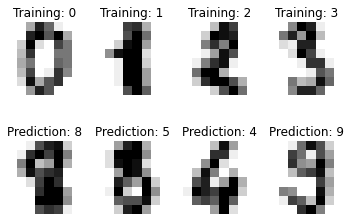

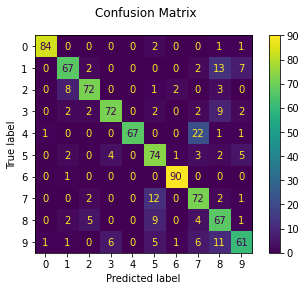

In [19]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
predicted = GNB_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test, y_test))
plt.show()

The **accuracy** of the **Gaussian Naive Bayes Classifier** was found out to be **0.8075**. 

Gaussian Naive Bayes Classifier is less accurate than the SVM Classifier (0.9688) when it comes to recognizing handwritten digits.

**3. Decision Trees**

Following is the code for defining the decision tree classifier dt_classifier and using it for making predictions:


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.75      0.65      0.69        91
           2       0.86      0.74      0.80        86
           3       0.67      0.73      0.70        91
           4       0.83      0.86      0.84        92
           5       0.61      0.75      0.67        91
           6       0.89      0.93      0.91        91
           7       0.87      0.75      0.81        89
           8       0.61      0.57      0.59        88
           9       0.67      0.76      0.71        92

    accuracy                           0.77       899
   macro avg       0.78      0.77      0.77       899
weighted avg       0.77      0.77      0.77       899



Confusion matrix:
[[82  0  0  1  1  2  0  0  0  2]
 [ 0 59  3  6  8  0  0  3  5  7]
 [ 1  4 64  8  0  1  3  0  4  1]
 [ 0  2  2 66  0  3  0  5  8  5]
 [ 1  2  0  0 79  4  3  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


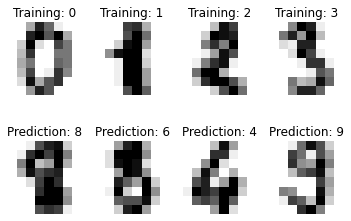

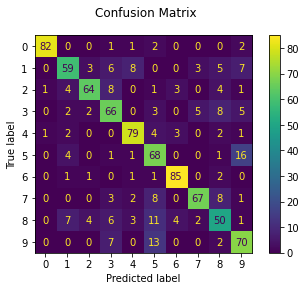

In [20]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()

The Decision Tree Classifier had an even lower **accuracy score = 0.7352.**

**4. Random Forest**

Let us try using the Random Forest Classifier from sklearn. The classifier is defined as RF_classifier in the code below:


Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        88
           1       0.90      0.42      0.57        91
           2       0.66      0.80      0.72        86
           3       0.55      0.82      0.66        91
           4       0.91      0.82      0.86        92
           5       0.74      0.62      0.67        91
           6       0.87      0.99      0.93        91
           7       0.70      1.00      0.82        89
           8       0.92      0.26      0.41        88
           9       0.74      0.82      0.77        92

    accuracy                           0.75       899
   macro avg       0.79      0.75      0.73       899
weighted avg       0.79      0.75      0.73       899




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 38  6 13  4  8  0 11  2  9]
 [ 1  0 69 13  0  0  0  2  0  1]
 [ 1  0  7 75  0  0  1  6  0  1]
 [ 7  0  0  0 75  1  6  3  0  0]
 [ 1  0  0 14  1 56  6  1  0 12]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 1  4 21 14  1  8  0 12 23  4]
 [ 2  0  1  7  0  3  0  4  0 75]]

Accuracy of the Algorithm:  0.7530589543937709


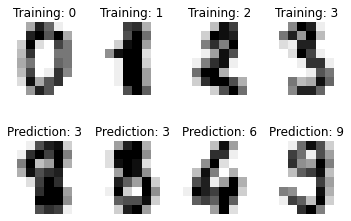

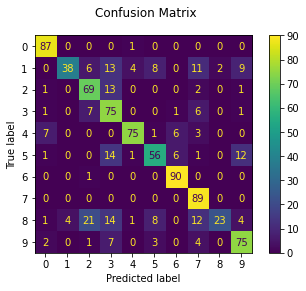

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)
predicted = RF_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (RF_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(RF_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", RF_classifier.score(X_test, y_test))
plt.show()

The accuracy score of the Random Forest Classifier is **0.7530** — nearly that of the Decision Tree Classifier.

**5. K Nearest Neighbours (KNN)**

Our next classifier is defined by using KNN classification algorithm KNN_classifier:


Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  0  0 87  0  0  1  0  4]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  1  1  0  0  0  1 79  1]
 [ 0  0  0  4  0  2  0  0  1 85]]

Accuracy of the Algorithm:  0.9555061179087876


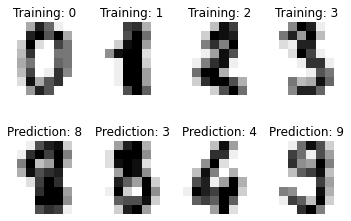

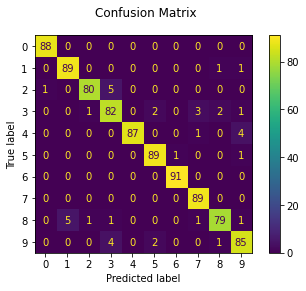

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted = KNN_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))
plt.show()

So the accuracy comes out to be **0.9555!**

**6. Stochastic Gradient Descent**

Let us try Stochastic Gradient Descent as our classifier sgd_classifier:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,



Classification report for classifier SGDClassifier(max_iter=5):
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        88
           1       0.98      0.55      0.70        91
           2       0.98      1.00      0.99        86
           3       0.83      0.87      0.85        91
           4       0.82      0.90      0.86        92
           5       0.77      0.96      0.85        91
           6       0.91      1.00      0.95        91
           7       0.92      0.98      0.95        89
           8       0.93      0.76      0.84        88
           9       0.92      0.87      0.89        92

    accuracy                           0.88       899
   macro avg       0.89      0.88      0.88       899
weighted avg       0.89      0.88      0.88       899



Confusion matrix:
[[84  0  0  0  1  3  0  0  0  0]
 [ 4 50  1  9 16  2  4  3  1  1]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  1 79  0  6  0  3  2  0]
 [ 3  0  0  0 83  0  2  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


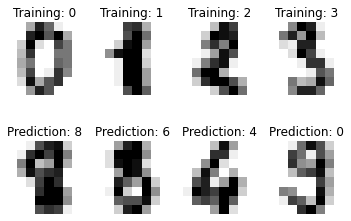

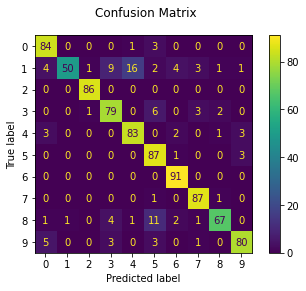

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_classifier.fit(X_train, y_train)
predicted = sgd_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (sgd_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(sgd_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", sgd_classifier.score(X_test, y_test))
plt.show()

The Stochastic Gradient Descent Algorithm gives us an accuracy score of **0.8932**.

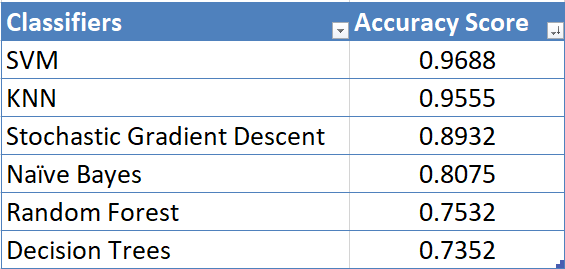